Note: Run whole Notebook to generate the output of all quesitons. Because I am using windows created in Question 1 for Question 3 also.
* References:
- https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6557272
- https://muthuku37.medium.com/detecting-voiced-unvoiced-and-silent-parts-of-a-speech-signal-74e6fb2f5e75

#Question 1-a (i)

In [227]:
import numpy as np
import matplotlib.pyplot as plt

In [228]:
def rectangular_window(N):
  return np.ones(N)

def triangular_window(N):
  window=[]
  for k in range(N):
    val = 1 - abs(k-((N-1)/2))/((N-1)/2)
    window.append(val)
  return window

def hamming_window(N):
  window = []
  for n in range(N):
    val = 0.54-0.46*np.cos((2*np.pi*n)/(N-1))
    window.append(val)
  return window

def hanning_window(N):
  return 0.5-0.5*np.cos((2 * np.pi * np.arange(N))/(N-1))

def blackman_window(N):
  window = []
  for n in range(N):
    val = 0.42 - 0.5 * np.cos((2*np.pi*n)/(N-1)) + 0.08 * np.cos((4*np.pi*n)/(N-1))
    window.append(val)
  return window


def plot_windows(rectangular_window, triangular_window, hamming_window, hanning_window, blackman_window):
    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.stem(rectangular_window, use_line_collection=True)
    plt.title("Rectangular Window")

    plt.subplot(232)
    plt.stem(triangular_window, use_line_collection=True)
    plt.title("Triangular (Bartlett) Window")

    plt.subplot(233)
    plt.stem(hamming_window, use_line_collection=True)
    plt.title("Hamming Window")

    plt.subplot(234)
    plt.stem(hanning_window, use_line_collection=True)
    plt.title("Hanning Window")

    plt.subplot(235)
    plt.stem(blackman_window, use_line_collection=True)
    plt.title("Blackman Window")

    plt.tight_layout()
    plt.show()

In [229]:
N = 200
tri_window = triangular_window(N)
rect_window = rectangular_window(N)
hamm_window = hamming_window(N)
hann_window = hanning_window(N)
black_window = blackman_window(N)

<ipython-input-228-283391e87249>:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(rectangular_window, use_line_collection=True)
<ipython-input-228-283391e87249>:36: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(triangular_window, use_line_collection=True)
<ipython-input-228-283391e87249>:40: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(

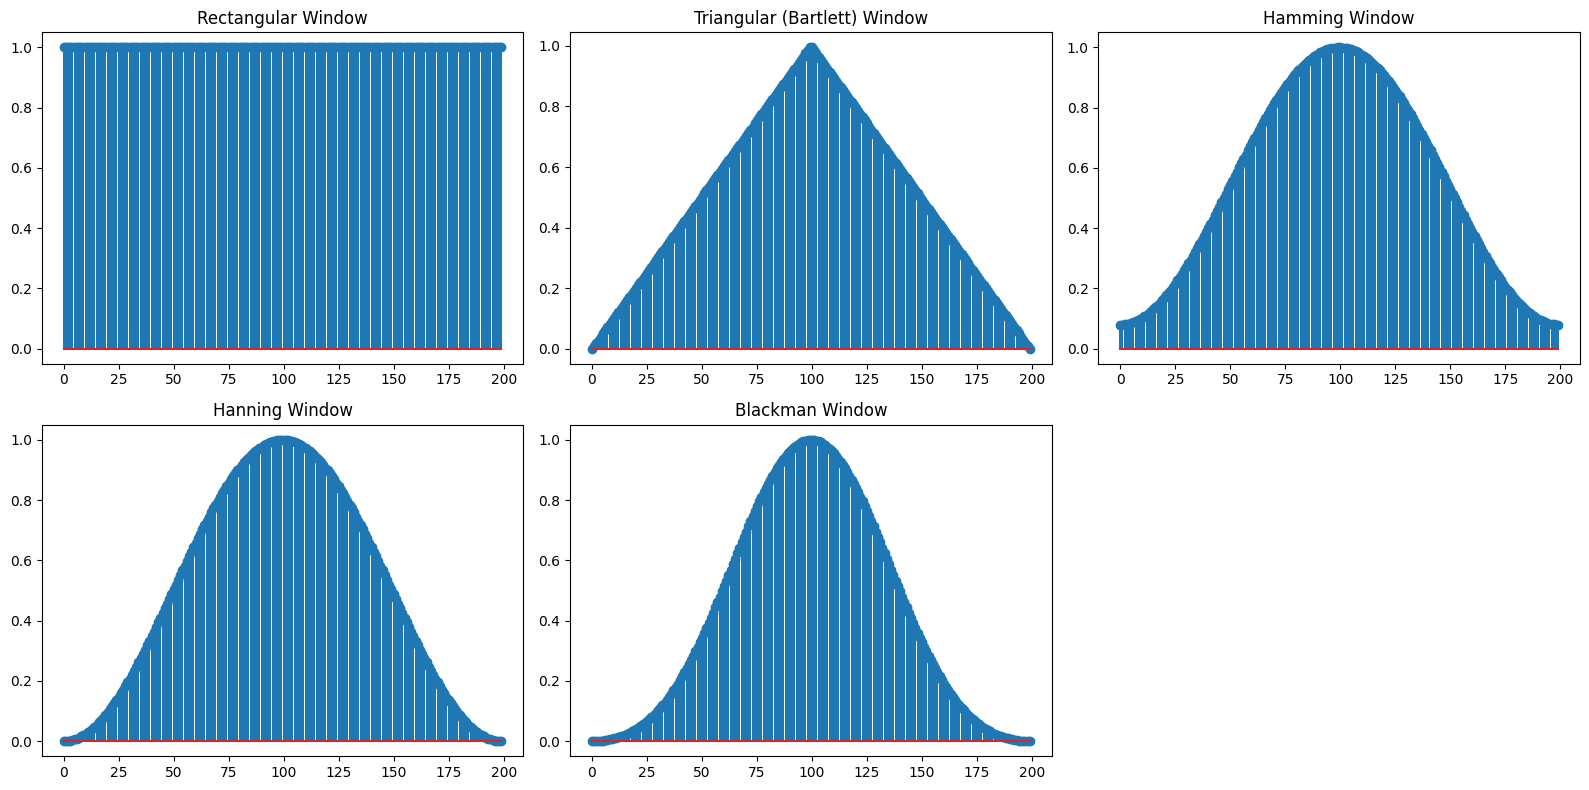

In [230]:
plot_windows(rect_window, tri_window, hamm_window, hann_window, black_window)

#Question 1-a (ii) Computing log Magnitude frequency response

In [231]:
N = 1024
Fs = 16000  # Sampling frequency in Hz
frequencies = np.linspace(0, Fs / 2, N // 2 + 1)

# Compute the frequency responses
rectangular_response = np.abs(np.fft.fft(rectangular_window(N)))
triangular_response = np.abs(np.fft.fft(triangular_window(N)))
hamming_response = np.abs(np.fft.fft(hamming_window(N)))
hanning_response = np.abs(np.fft.fft(hanning_window(N)))
blackman_response = np.abs(np.fft.fft(blackman_window(N)))

<ipython-input-232-0ed4610d4162>:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(frequencies[:N//2], 20 * np.log10(rectangular_response[:N//2]))
<ipython-input-232-0ed4610d4162>:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(frequencies[:N//2], 20 * np.log10(triangular_response[:N//2]))


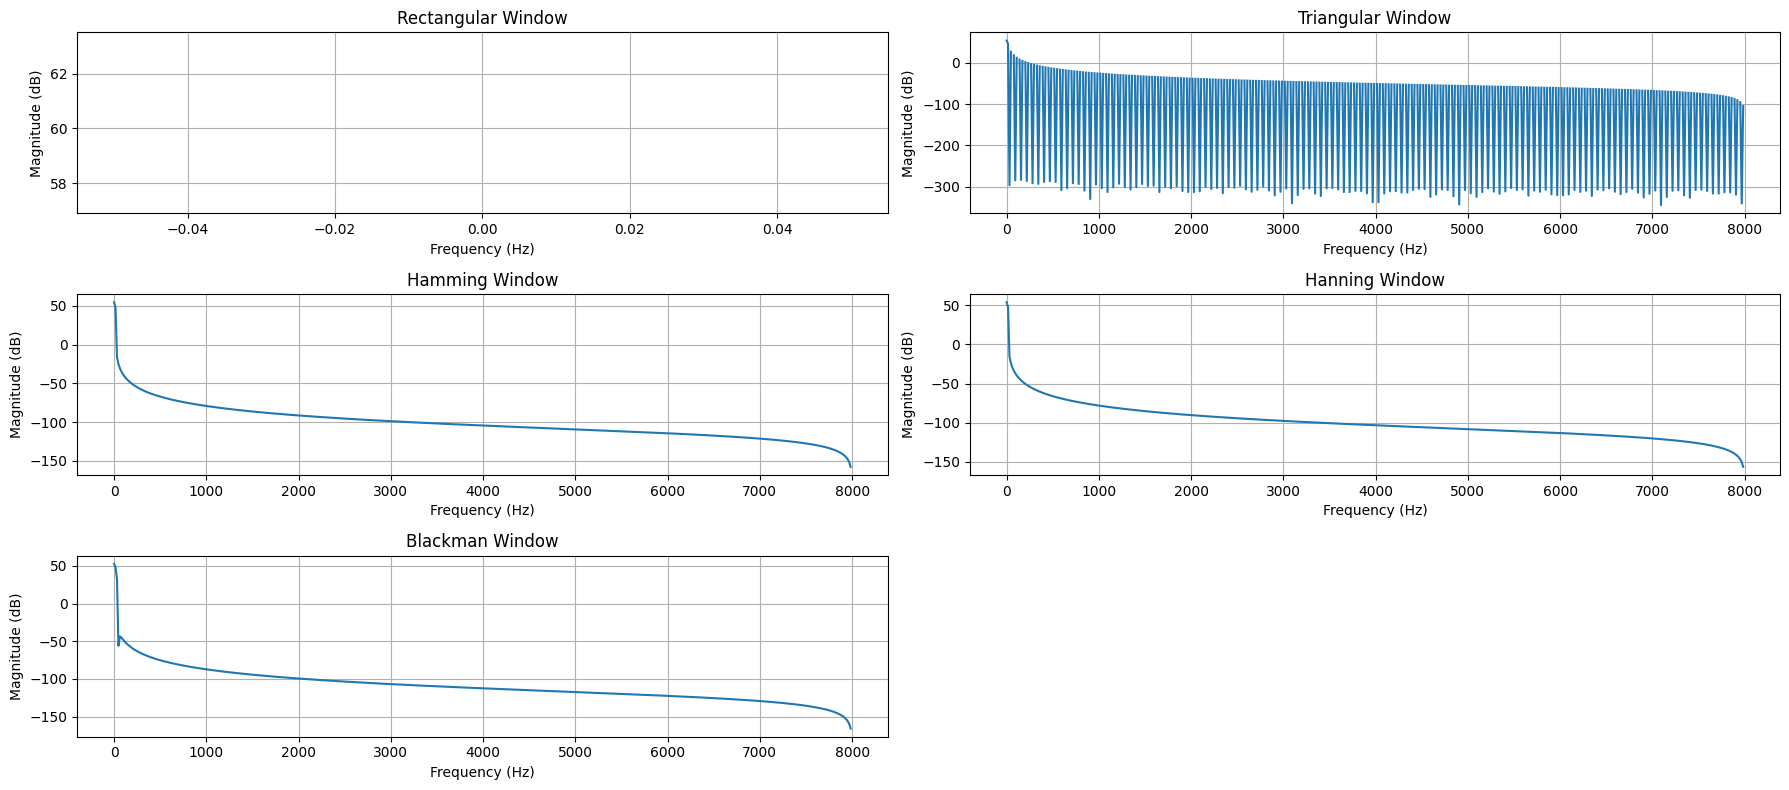

In [232]:
def plot_log_freq_response():
  # Plot the log magnitude frequency responses
  plt.figure(figsize=(18, 8))

  plt.subplot(3, 2, 1)
  plt.plot(frequencies[:N//2], 20 * np.log10(rectangular_response[:N//2]))
  plt.title('Rectangular Window')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  plt.grid(True)

  plt.subplot(3, 2, 2)
  plt.plot(frequencies[:N//2], 20 * np.log10(triangular_response[:N//2]))
  plt.title('Triangular Window')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  plt.grid(True)

  plt.subplot(3, 2, 3)
  plt.plot(frequencies[:N//2], 20 * np.log10(hamming_response[:N//2]))
  plt.title('Hamming Window')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  plt.grid(True)

  plt.subplot(3, 2, 4)
  plt.plot(frequencies[:N//2], 20 * np.log10(hanning_response[:N//2]))
  plt.title('Hanning Window')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  plt.grid(True)

  plt.subplot(3, 2, 5)
  plt.plot(frequencies[:N//2], 20 * np.log10(blackman_response[:N//2]))
  plt.title('Blackman Window')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  plt.grid(True)

  plt.tight_layout()
  plt.show()


plot_log_freq_response()

# Question 3

In [233]:
import librosa
data, sr = librosa.load('/content/footballisadangerousgame.wav', sr=None)

In [234]:
import numpy as np
import scipy

M = data.size
Fs = 16000

t = np.arange(0, M)/Fs

In [235]:
frame_length_sec = 0.02 # 20ms frame length
frame_shift_sec = 0.01  # 50% overlap

frame_length = int(frame_length_sec * Fs)
frame_shift = int(frame_shift_sec * Fs)

num_frames = int(np.ceil(float(np.abs(len(data)-frame_length))/frame_shift))

padded_length = num_frames * frame_shift + frame_length
padded_speech = np.append(data, np.zeros((padded_length - len(data))))

frames = np.zeros((num_frames, frame_length))
for i in range(num_frames):
  start_idx = i * frame_shift
  frames[i] = padded_speech[start_idx:start_idx+frame_length]


In [236]:
def call_fn():
  fn_name = input("Which windowing function you will use? (hamming, hanning, rectiangle, triangle, blackman): ")
  if fn_name == 'hamm':
    return hamming_window
  elif fn_name == 'hann':
    return hanning_window
  elif fn_name == 'rect':
    return rectangular_window
  elif fn_name == 'tri':
    return triangular_window
  else:
    return blackman_window

In [237]:
window_fn = call_fn()
hamm_window = window_fn(frame_length)
windowed_frames = frames * hamm_window


def short_time_energy(frames):
    return np.sum(frames**2, axis=1)

# Compute zero-crossing rate
def zero_crossing_rate(frames):
    zcr = np.sum(np.abs(np.diff(np.sign(frames))), axis=1)
    return zcr

# Compute autocorrelation
def autocorrelation(frames):
    autocorr_peaks = []
    for frame in frames:
        autocorr = np.correlate(frame, frame, mode='full')
        peak_lag = np.argmax(autocorr)
        autocorr_peaks.append(peak_lag)
    return autocorr_peaks



# Normalizing the energy
non_windowed_ste = short_time_energy(frames)
windowed_ste = short_time_energy(windowed_frames)
non_windowed_ste /= non_windowed_ste.max()
windowed_ste /= windowed_ste.max()

# Normalizing the zcr
non_windowed_zcr = zero_crossing_rate(frames)
windowed_zcr = zero_crossing_rate(frames)
non_windowed_zcr /= non_windowed_zcr.max()
windowed_zcr /= windowed_zcr.max()

# Normalizing the autocorr
non_windowed_corr = autocorrelation(frames)
windowed_corr = autocorrelation(frames)
non_windowed_corr /= max(non_windowed_corr)
windowed_corr /= max(windowed_corr)

Which windowing function you will use? (hamming, hanning, rectiangle, triangle, blackman): hamm


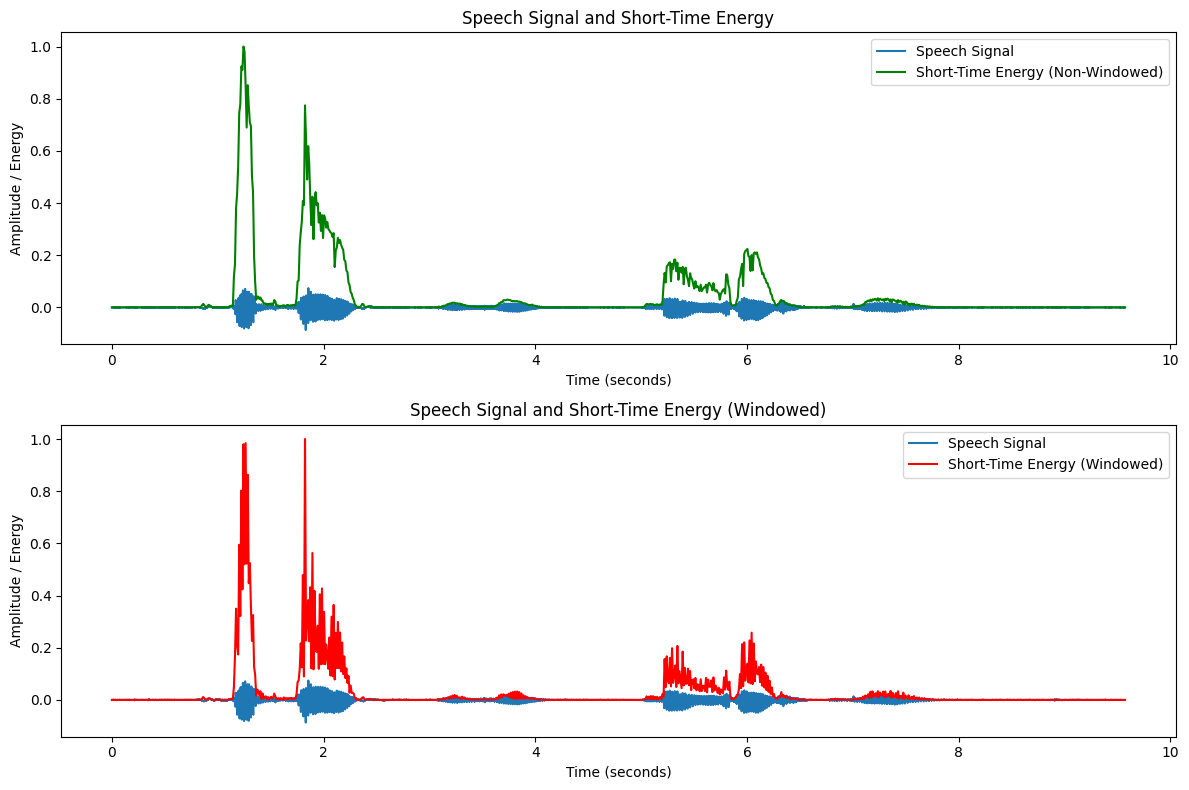

In [238]:
# Time vectors for plotting
t = np.linspace(0, len(data) / Fs, len(data))
t_ste = np.linspace(0, len(data) / Fs, len(non_windowed_ste))
t_zcr = np.linspace(0, len(data) / Fs, len(non_windowed_zcr))
t_corr = np.linspace(0, len(data) / Fs, len(non_windowed_corr))

# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, data, label='Speech Signal')
plt.plot(t_ste, non_windowed_ste, 'g', label='Short-Time Energy (Non-Windowed)')
plt.legend()
plt.title('Speech Signal and Short-Time Energy')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude / Energy')

plt.subplot(2, 1, 2)
plt.plot(t, data, label='Speech Signal')
plt.plot(t_ste, windowed_ste, 'r', label='Short-Time Energy (Windowed)')
plt.legend()
plt.title('Speech Signal and Short-Time Energy (Windowed)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude / Energy')

plt.tight_layout()
plt.show()

In [239]:
np.mean(windowed_zcr)

0.17380926164784344

In [240]:
voiced_threshold_ste = np.mean(windowed_ste)
voiced_threshold_zcr = np.mean(windowed_zcr)
voiced_threshold_autocorr = np.mean(windowed_corr)


# Classify each frame
frame_classification_energy = []
frame_classification_zcr = []
frame_classification_corr = []

for energy in windowed_ste:
    if energy > voiced_threshold_ste:
        frame_classification_energy.append('Voiced')
    else:
        frame_classification_energy.append('Unvoiced')

for zcr in windowed_zcr:
    if zcr < voiced_threshold_zcr:
      frame_classification_zcr.append('Voiced')
    else:
      frame_classification_zcr.append('Unvoiced')

for zcr in windowed_corr:
    if zcr > voiced_threshold_zcr:
      frame_classification_corr.append('Voiced')
    else:
      frame_classification_corr.append('Unvoiced')

In [241]:
cnt_voiced_ste, cnt_unvoiced_ste = 0, 0
cnt_voiced_zcr, cnt_unvoiced_zcr = 0, 0
cnt_voiced_corr, cnt_unvoiced_corr = 0, 0

for energy, zcr, corr in zip(frame_classification_energy, frame_classification_zcr, frame_classification_corr):
  if energy=='Voiced':
    cnt_voiced_ste+=1
  else:
    cnt_unvoiced_ste+=1
  if zcr == 'Voiced':
    cnt_voiced_zcr+=1
  else:
    cnt_unvoiced_zcr+=1
  if corr == 'Voiced':
    cnt_voiced_corr+=1
  else:
    cnt_unvoiced_corr+=1

In [242]:
# Print results
print("Total number of frames: ", num_frames)
print()
print("Voiced segments (Energy):", cnt_voiced_ste, "frames")
print("Unvoiced segments (Energy):", cnt_unvoiced_ste, "frames")
print('-'*20)
print("Voiced segments (ZCR):", cnt_voiced_zcr, "frames")
print("Unvoiced segments (ZCR):", cnt_unvoiced_zcr, "frames")
print('-'*20)
print("Voiced segments (Autocorrelation):", cnt_voiced_corr, "frames")
print("Unvoiced segments (Autocorrelation):", cnt_unvoiced_corr, "frames")

Total number of frames:  956

Voiced segments (Energy): 166 frames
Unvoiced segments (Energy): 790 frames
--------------------
Voiced segments (ZCR): 611 frames
Unvoiced segments (ZCR): 345 frames
--------------------
Voiced segments (Autocorrelation): 956 frames
Unvoiced segments (Autocorrelation): 0 frames


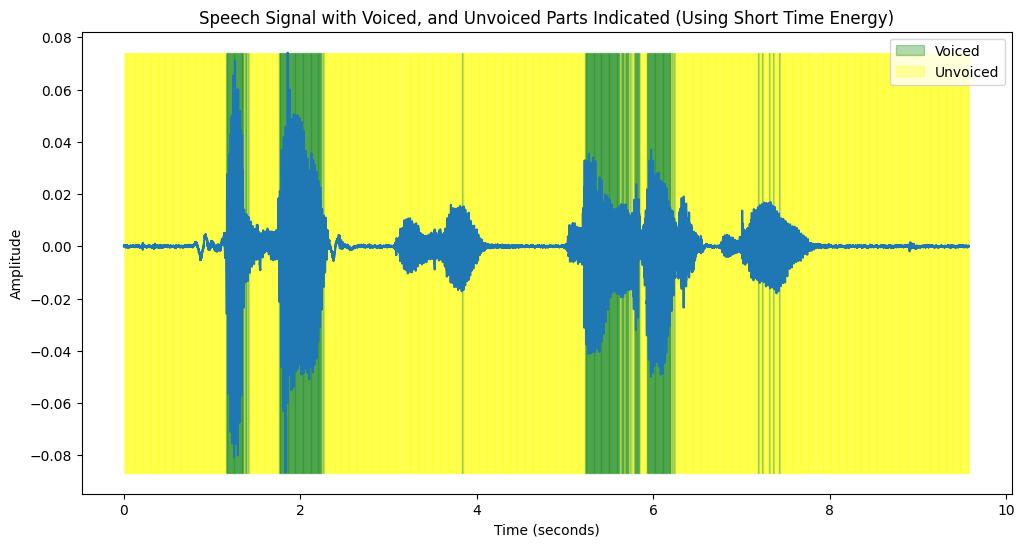

In [243]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
plt.plot(t, data, label='Speech Signal')

# Create patches for the legend
green_patch = mpatches.Patch(color='green', label='Voiced', alpha=0.3)
yellow_patch = mpatches.Patch(color='yellow', label='Unvoiced', alpha=0.3)

# Overlay classification as shaded regions on the plot
for i, label in enumerate(frame_classification_energy):
    if label == 'Voiced':
        plt.fill_betweenx([min(data), max(data)], t_ste[i], t_ste[i]+frame_shift_sec, color='green', alpha=0.3)
    elif label == 'Unvoiced':
        plt.fill_betweenx([min(data), max(data)], t_ste[i], t_ste[i]+frame_shift_sec, color='yellow', alpha=0.3)

plt.legend(handles=[green_patch, yellow_patch])
plt.title('Speech Signal with Voiced, and Unvoiced Parts Indicated (Using Short Time Energy)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

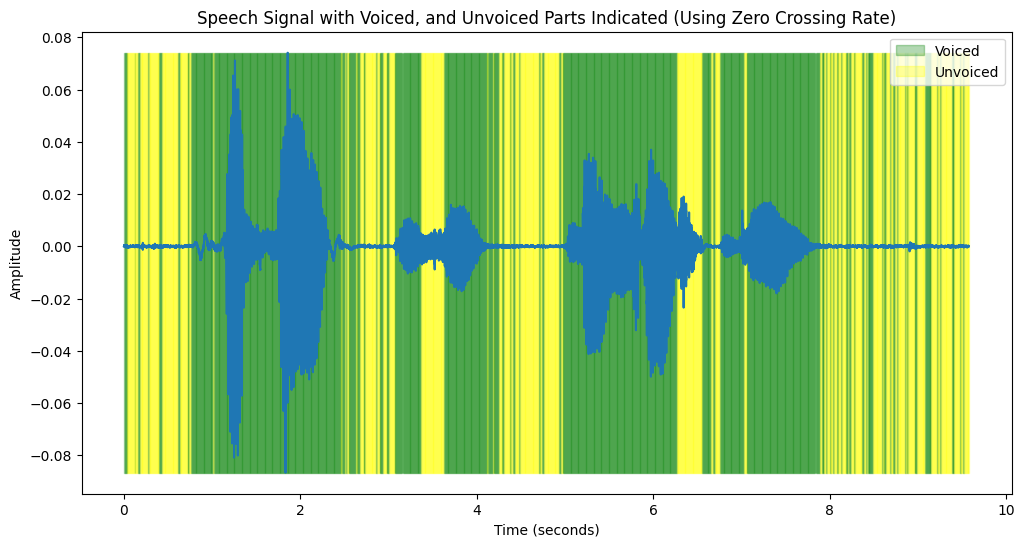

In [244]:
plt.figure(figsize=(12, 6))
plt.plot(t, data, label='Speech Signal')

# Create patches for the legend
green_patch = mpatches.Patch(color='green', label='Voiced', alpha=0.3)
yellow_patch = mpatches.Patch(color='yellow', label='Unvoiced', alpha=0.3)

# Overlay classification as shaded regions on the plot
for i, label in enumerate(frame_classification_zcr):
    if label == 'Voiced':
        plt.fill_betweenx([min(data), max(data)], t_zcr[i], t_zcr[i]+frame_shift_sec, color='green', alpha=0.3)
    elif label == 'Unvoiced':
        plt.fill_betweenx([min(data), max(data)], t_zcr[i], t_zcr[i]+frame_shift_sec, color='yellow', alpha=0.3)

plt.legend(handles=[green_patch, yellow_patch])
plt.title('Speech Signal with Voiced, and Unvoiced Parts Indicated (Using Zero Crossing Rate)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

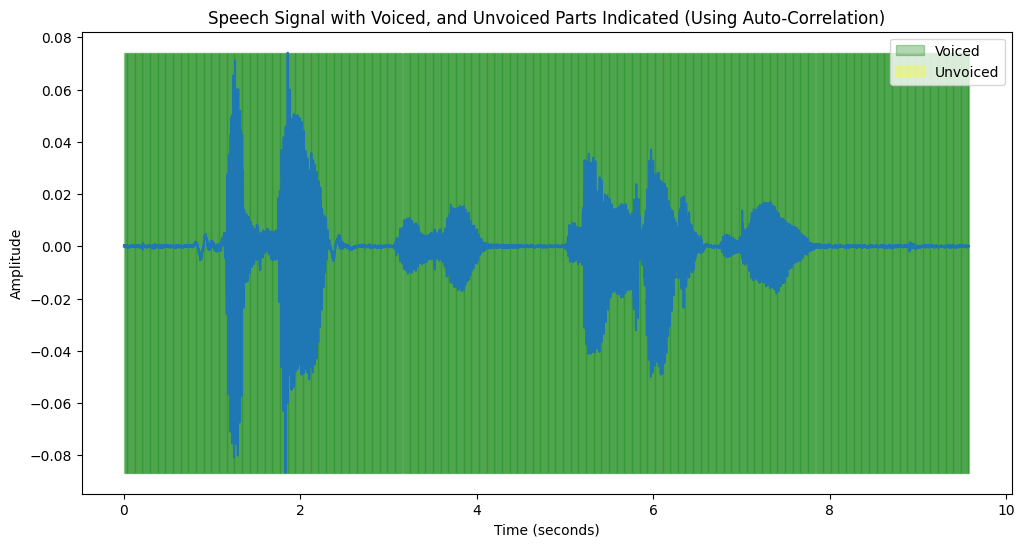

In [245]:
plt.figure(figsize=(12, 6))
plt.plot(t, data, label='Speech Signal')

# Create patches for the legend
green_patch = mpatches.Patch(color='green', label='Voiced', alpha=0.3)
yellow_patch = mpatches.Patch(color='yellow', label='Unvoiced', alpha=0.3)

# Overlay classification as shaded regions on the plot
for i, label in enumerate(frame_classification_corr):
    if label == 'Voiced':
        plt.fill_betweenx([min(data), max(data)], t_corr[i], t_corr[i]+frame_shift_sec, color='green', alpha=0.3)
    elif label == 'Unvoiced':
        plt.fill_betweenx([min(data), max(data)], t_corr[i], t_corr[i]+frame_shift_sec, color='yellow', alpha=0.3)

plt.legend(handles=[green_patch, yellow_patch])
plt.title('Speech Signal with Voiced, and Unvoiced Parts Indicated (Using Auto-Correlation)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()